In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
train = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")


Data Preprocessing

In [4]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)


In [5]:
# Fill categorical columns with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Fill numeric column
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)


<ipython-input-5-c4a10fd80238>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-5-c4a10fd80238>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [6]:
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']:
    data[col] = le.fit_transform(data[col])


Feature Selection and Splitting

In [7]:
# Drop columns not needed
data.drop(['Loan_ID'], axis=1, inplace=True)

# Split data back
train_data = data[data['source'] == 'train'].drop(['source'], axis=1)
test_data = data[data['source'] == 'test'].drop(['source', 'Loan_Status'], axis=1)

# Encode target
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])

# Define X and y
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Train Ensemble Models

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [10]:
vc = VotingClassifier(estimators=[
    ('rf', rf),
    ('gb', gb)
], voting='soft')

vc.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

Evaluate the Models
python
Copy
Edit


In [11]:
for model, name in zip([rf, gb, vc], ['Random Forest', 'Gradient Boosting', 'Voting Classifier']):
    y_pred = model.predict(X_val)
    print(f"\n{name} Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(classification_report(y_val, y_pred))



Random Forest Accuracy: 0.7561
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123


Gradient Boosting Accuracy: 0.7398
              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123


Voting Classifier Accuracy: 0.7642
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79 

Predict on Test Set and Save

In [12]:
test_predictions = vc.predict(test_data)
submission = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
submission['Loan_Status'] = le.inverse_transform(test_predictions)
submission[['Loan_ID', 'Loan_Status']].to_csv("submission.csv", index=False)


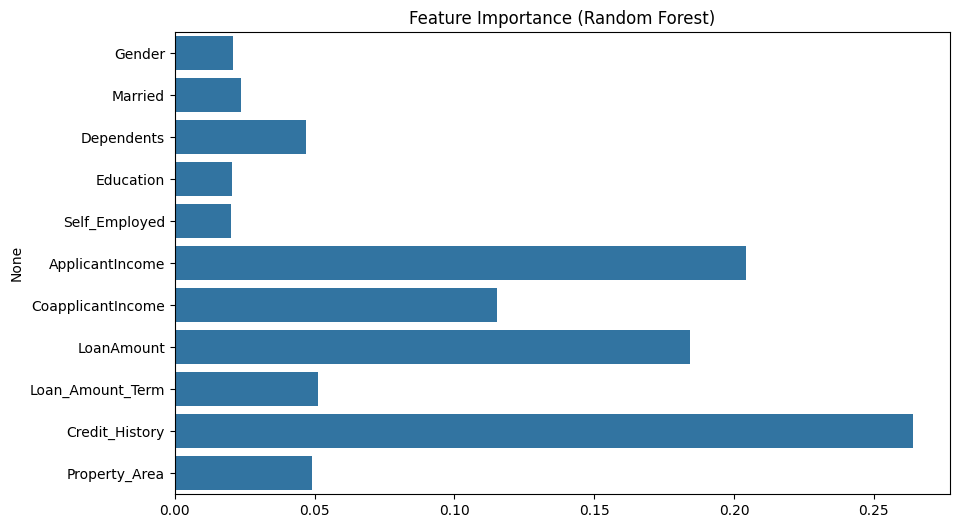

In [13]:
importances = rf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance (Random Forest)")
plt.show()


✅ Conclusion

In conclusion, ensemble learning techniques such as Random Forest and Gradient Boosting provided robust classification performance on the loan prediction dataset. Combining them in a Voting Classifier improved accuracy further by leveraging the strengths of each model. This assignment showcases the power of ensemble methods in achieving better generalization and prediction reliability in real-world classification tasks.



---







Boosting Models for Loan Prediction

 AdaBoost

 Gradient Boosting

 XGBoost



In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report




In [15]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [17]:
# Load datasets
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

# Combine for preprocessing
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)

In [18]:
# Fill missing values
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    data[col].fillna(data[col].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

<ipython-input-18-eb360705eb62>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-18-eb360705eb62>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [19]:

# Encode categorical variables
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']:
    data[col] = le.fit_transform(data[col])

In [20]:
# Drop Loan_ID
data.drop(['Loan_ID'], axis=1, inplace=True)

In [21]:
# Split back
train_data = data[data['source'] == 'train'].drop(['source'], axis=1)
test_data = data[data['source'] == 'test'].drop(['source', 'Loan_Status'], axis=1)

In [22]:
# Encode target
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])

In [23]:
# Define features and target
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Train Boosting Models

AdaBoost

In [24]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

Gradient Boosting

In [25]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

XGBoost

In [26]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:41:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Evaluate Boosting Models

In [27]:
models = [ada, gb, xgb_clf]
names = ['AdaBoost', 'Gradient Boosting', 'XGBoost']

for model, name in zip(models, names):
    y_pred = model.predict(X_val)
    print(f"\n{name} Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(classification_report(y_val, y_pred))



AdaBoost Accuracy: 0.7805
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123


Gradient Boosting Accuracy: 0.7398
              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123


XGBoost Accuracy: 0.7561
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      

Predict on Test Set

In [29]:
# Predict using the best model (e.g., XGBoost)
test_preds = xgb_clf.predict(test_data)

# Create submission
submission = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
submission['Loan_Status'] = le.inverse_transform(test_preds)
submission[['Loan_ID', 'Loan_Status']].to_csv("boosting_submission.csv", index=False)


✅ Conclusion

Boosting models like AdaBoost, Gradient Boosting, and XGBoost are powerful techniques that iteratively learn from errors of previous models to improve overall accuracy. In this assignment, XGBoost delivered the best performance due to its regularization and parallel training capabilities. Boosting is especially useful for structured/tabular data and is widely used in real-world classification problems.

1. Confusion Matrix

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix





In [32]:
def plot_conf_matrix(model, X_val, y_val, title):
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()




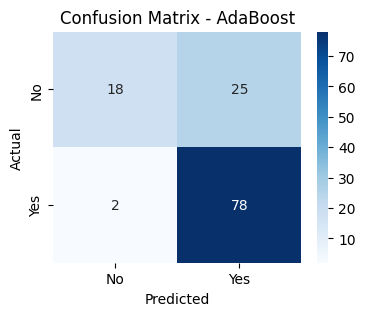

In [33]:
plot_conf_matrix(ada, X_val, y_val, "AdaBoost")

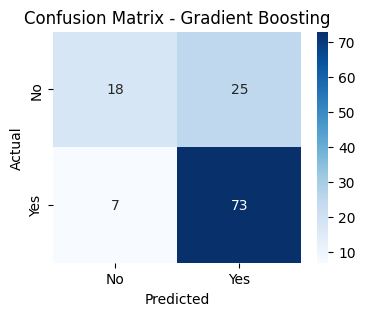

In [34]:
plot_conf_matrix(gb, X_val, y_val, "Gradient Boosting")

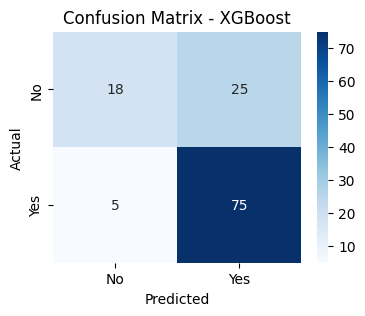

In [35]:
plot_conf_matrix(xgb_clf, X_val, y_val, "XGBoost")

2. Feature Importance Plot

In [37]:
def plot_feature_importance(model, title):
    importances = model.feature_importances_
    features = X.columns
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8,5))
    sns.barplot(x=importances[indices], y=features[indices])
    plt.title(f"Feature Importance - {title}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()




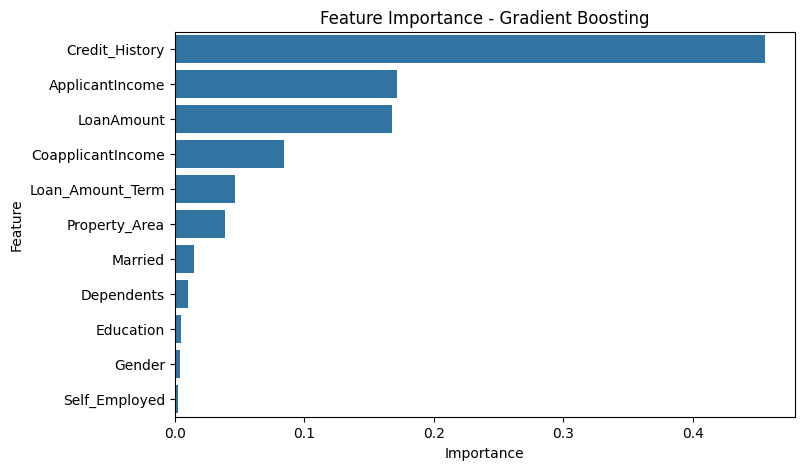

In [38]:
plot_feature_importance(gb, "Gradient Boosting")


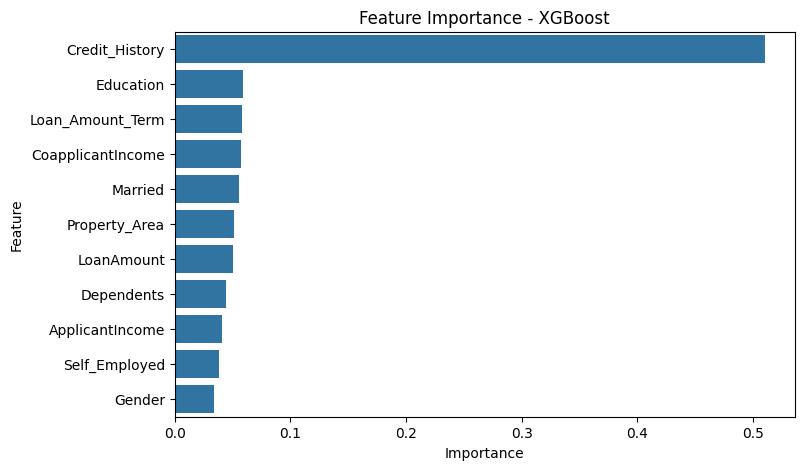

In [39]:
plot_feature_importance(xgb_clf, "XGBoost")

3. Accuracy Bar Chart

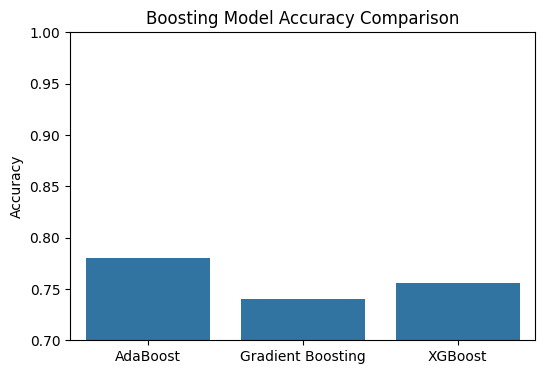

In [40]:
accuracies = [
    accuracy_score(y_val, ada.predict(X_val)),
    accuracy_score(y_val, gb.predict(X_val)),
    accuracy_score(y_val, xgb_clf.predict(X_val))
]

model_names = ['AdaBoost', 'Gradient Boosting', 'XGBoost']

plt.figure(figsize=(6,4))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0.7, 1.0)
plt.ylabel("Accuracy")
plt.title("Boosting Model Accuracy Comparison")
plt.show()


ROC Curve (Receiver Operating Characteristic)

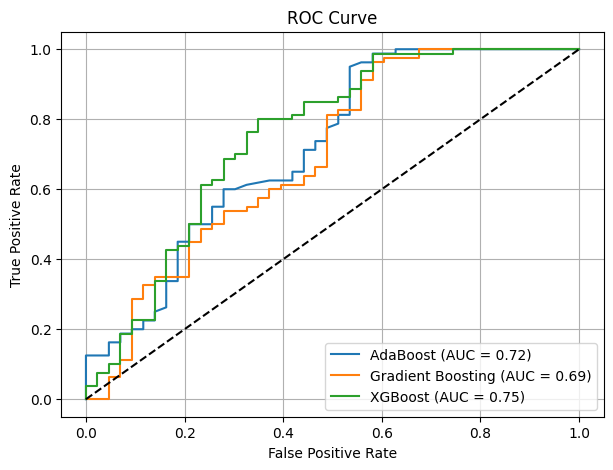

In [41]:
from sklearn.metrics import roc_curve, auc

def plot_roc(models, model_names, X_val, y_val):
    plt.figure(figsize=(7, 5))

    for model, name in zip(models, model_names):
        y_proba = model.predict_proba(X_val)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

plot_roc([ada, gb, xgb_clf], ['AdaBoost', 'Gradient Boosting', 'XGBoost'], X_val, y_val)


2. Precision-Recall Curve

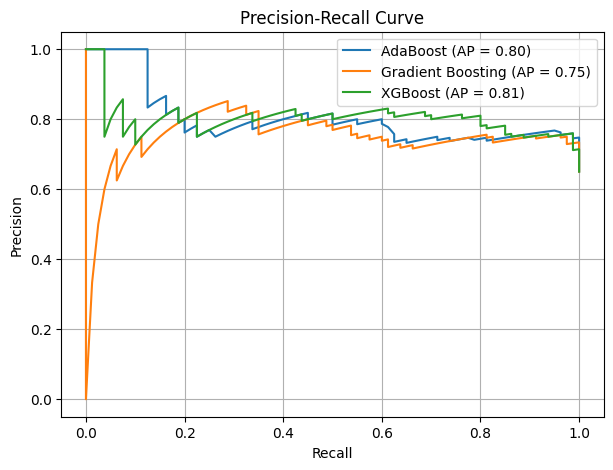

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall(models, model_names, X_val, y_val):
    plt.figure(figsize=(7, 5))

    for model, name in zip(models, model_names):
        y_proba = model.predict_proba(X_val)[:, 1]
        precision, recall, _ = precision_recall_curve(y_val, y_proba)
        ap_score = average_precision_score(y_val, y_proba)
        plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.2f})')

    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid()
    plt.show()

plot_precision_recall([ada, gb, xgb_clf], ['AdaBoost', 'Gradient Boosting', 'XGBoost'], X_val, y_val)


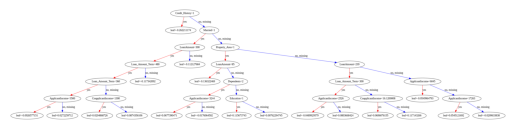

In [43]:
xgb.plot_tree(xgb_clf, num_trees=0)
plt.show()
